In [103]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [104]:
from sklearn.model_selection import train_test_split
# Загрузка данных с первого листа файла Excel
df1 = pd.read_excel('../data/dataSet.xlsx', sheet_name='Программы')
df2 = pd.read_excel('../data/dataSet.xlsx', sheet_name='Предприятия')


In [105]:
# Предварительная обработка текста
df1['conditions'] = df1['conditions'].str.lower().str.replace('[^\w\s]', '')
df2['description'] = df2['description'].str.lower().str.replace('[^\w\s]', '')


In [106]:
# Преобразование строки в список
df2['programms'] = df2['programms'].str.split(',')

# "Взрыв" списка
df2 = df2.explode('programms')

# Преобразование типа данных для корректного слияния
df2['programms'] = df2['programms'].astype(int)
df1['number'] = df1['number'].astype(int)

# Объединение двух DataFrame
df = pd.merge(df1, df2, left_on='number', right_on='programms')

# Удаление ненужного столбца
df = df.drop(columns=['programms'])

df

,number,name,conditions,number_company,description
0,0,Финансовая Поддержка 2024,участник должен быть зарегистрированной компан...,7,"""techtravel solutions"" - компания, разрабатыва..."
1,0,Финансовая Поддержка 2024,участник должен быть зарегистрированной компан...,8,"""youngentrepreneur ventures"" - молодая компани..."
2,0,Финансовая Поддержка 2024,участник должен быть зарегистрированной компан...,9,"""smallbusiness development group"" - группа ком..."
3,0,Финансовая Поддержка 2024,участник должен быть зарегистрированной компан...,12,"""smarttourism technologies"" - компания, разраб..."
4,0,Финансовая Поддержка 2024,участник должен быть зарегистрированной компан...,13,"""youthentrepreneurship hub"" - стартап, создающ..."
...,...,...,...,...,...
130,7,Развитие Инфраструктуры Малого Бизнеса,представление проекта по развитию малого бизне...,55,"""smallbiz financial solutions"" - компания, пре..."
131,7,Развитие Инфраструктуры Малого Бизнеса,представление проекта по развитию малого бизне...,61,"предприятие, предоставляющее услуги по строите..."
132,7,Развитие Инфраструктуры Малого Бизнеса,представление проекта по развитию малого бизне...,64,"организация, создающая интеллектуальные решени..."
133,7,Развитие Инфраструктуры Малого Бизнеса,представление проекта по развитию малого бизне...,70,"компания, занимающаяся улучшением инфраструкту..."


In [107]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from rake_nltk import Rake
import nltk

In [108]:
# Устанавливаем стоп-слова для русского языка
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\artem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [109]:
# Объединение текста описания предприятия и текста критериев участия
df['combined_text'] = df['description'] + ' ' + df['conditions']

In [110]:
# Извлечение ключевых слов с помощью TF-IDF
tfidf = TfidfVectorizer(max_features=1000, stop_words=list(stop_words))
X_tfidf = tfidf.fit_transform(df['combined_text'])
y = df['number']

In [111]:
# Создание обучающей и тестовой выборки
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.4, random_state=42)

In [112]:
# Обучение модели на основе TF-IDF
rf_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_tfidf.fit(X_train_tfidf, y_train)

# Предсказание классов для каждого предприятия с помощью модели на основе TF-IDF
predicted_classes_tfidf = rf_tfidf.predict_proba(X_tfidf)

print(predicted_classes_tfidf)
# Вывод вероятностей для каждого предприятия и каждой госпрограммы (класса)
for i, probs in enumerate(predicted_classes_tfidf):
    print(f"Вероятности участия предприятия {i + 1} в госпрограммах (TF-IDF):")
    for j, prob in enumerate(probs):
        print(f"Госпрограмма {j}: {prob}")



[[1.   0.   0.   ... 0.   0.   0.  ]
 [0.99 0.   0.   ... 0.   0.01 0.  ]
 [1.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   1.  ]
 [0.   0.   0.   ... 0.   0.01 0.99]
 [0.   0.   0.   ... 0.   0.01 0.99]]
Вероятности участия предприятия 1 в госпрограммах (TF-IDF):
Госпрограмма 0: 1.0
Госпрограмма 1: 0.0
Госпрограмма 2: 0.0
Госпрограмма 3: 0.0
Госпрограмма 4: 0.0
Госпрограмма 5: 0.0
Госпрограмма 6: 0.0
Госпрограмма 7: 0.0
Вероятности участия предприятия 2 в госпрограммах (TF-IDF):
Госпрограмма 0: 0.99
Госпрограмма 1: 0.0
Госпрограмма 2: 0.0
Госпрограмма 3: 0.0
Госпрограмма 4: 0.0
Госпрограмма 5: 0.0
Госпрограмма 6: 0.01
Госпрограмма 7: 0.0
Вероятности участия предприятия 3 в госпрограммах (TF-IDF):
Госпрограмма 0: 1.0
Госпрограмма 1: 0.0
Госпрограмма 2: 0.0
Госпрограмма 3: 0.0
Госпрограмма 4: 0.0
Госпрограмма 5: 0.0
Госпрограмма 6: 0.0
Госпрограмма 7: 0.0
Вероятности участия предприятия 4 в госпрограммах (TF-IDF):
Госпрограмма 0: 1.0
Госпрограмма 1: 0.0
Госпрограм

In [113]:
import nltk
# Извлечение ключевых слов с помощью RAKE
r = Rake(language='russian', stopwords=stop_words)
nltk.download('punkt')

# Извлечение ключевых слов с помощью RAKE
r = Rake(language='russian', stopwords=stop_words)
df['rake_keywords'] = df['combined_text'].apply(lambda x: r.extract_keywords_from_text(x))
df['rake_keywords'] = df['combined_text'].apply(lambda x: r.get_ranked_phrases())

# Преобразование списка ключевых слов в текст для TF-IDF векторизатора
df['rake_keywords'] = df['rake_keywords'].apply(lambda x: ' '.join(x))

# Извлечение TF-IDF признаков из ключевых слов RAKE
X_rake = tfidf.transform(df['rake_keywords'])

# Создание обучающей и тестовой выборки для ключевых слов RAKE
X_train_rake, X_test_rake, y_train, y_test = train_test_split(X_rake, y, test_size=0.4, random_state=42)

# Обучение модели на основе ключевых слов RAKE
rf_rake = RandomForestClassifier(n_estimators=100, random_state=42)
rf_rake.fit(X_train_rake, y_train)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\artem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


RandomForestClassifier(random_state=42)

In [114]:
# Предсказание классов для каждого предприятия с помощью модели на основе RAKE
predicted_classes_rake = rf_rake.predict_proba(X_rake)

# Вывод вероятностей для каждого предприятия и каждой госпрограммы (класса)
for i, probs in enumerate(predicted_classes_rake):
    print(f"Вероятности участия предприятия {i + 1} в госпрограммах (RAKE):")
    for j, prob in enumerate(probs):
        print(f"Госпрограмма {j}: {prob}")

Вероятности участия предприятия 1 в госпрограммах (RAKE):
Госпрограмма 0: 0.1750617283950617
Госпрограмма 1: 0.1624691358024691
Госпрограмма 2: 0.12567901234567905
Госпрограмма 3: 0.09654320987654322
Госпрограмма 4: 0.11234567901234564
Госпрограмма 5: 0.09148148148148147
Госпрограмма 6: 0.12098765432098763
Госпрограмма 7: 0.11543209876543209
Вероятности участия предприятия 2 в госпрограммах (RAKE):
Госпрограмма 0: 0.1750617283950617
Госпрограмма 1: 0.1624691358024691
Госпрограмма 2: 0.12567901234567905
Госпрограмма 3: 0.09654320987654322
Госпрограмма 4: 0.11234567901234564
Госпрограмма 5: 0.09148148148148147
Госпрограмма 6: 0.12098765432098763
Госпрограмма 7: 0.11543209876543209
Вероятности участия предприятия 3 в госпрограммах (RAKE):
Госпрограмма 0: 0.1750617283950617
Госпрограмма 1: 0.1624691358024691
Госпрограмма 2: 0.12567901234567905
Госпрограмма 3: 0.09654320987654322
Госпрограмма 4: 0.11234567901234564
Госпрограмма 5: 0.09148148148148147
Госпрограмма 6: 0.12098765432098763
Госп

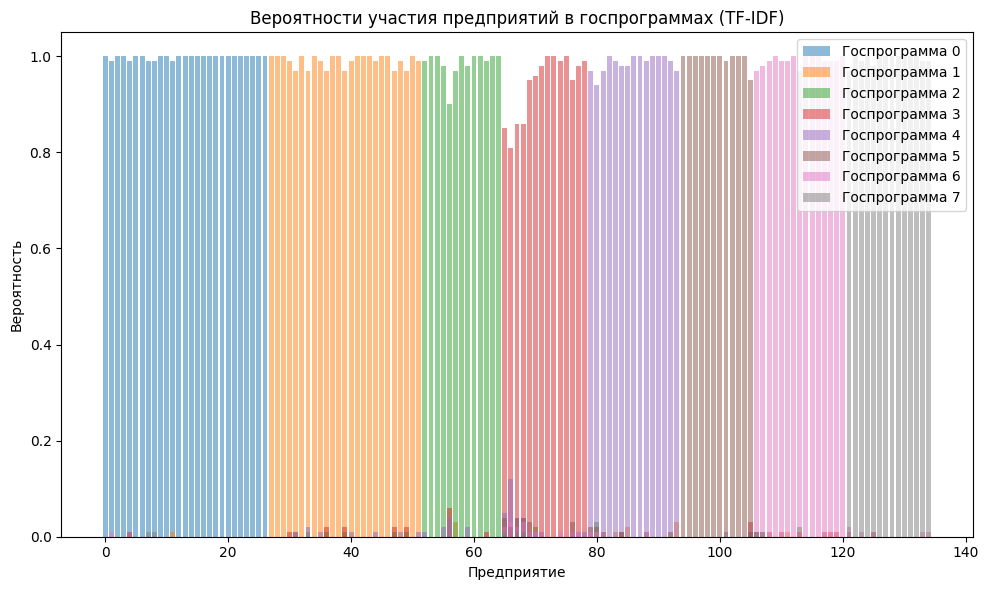

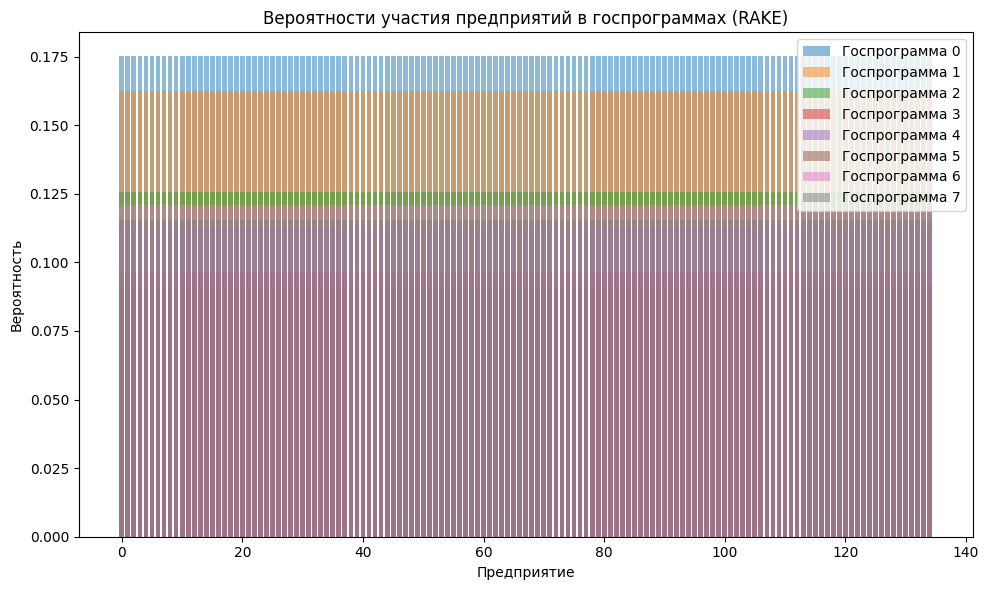

In [115]:
import matplotlib.pyplot as plt

# Функция для построения гистограммы вероятностей участия предприятия в госпрограммах
def plot_probabilities(probabilities, model_name):
    num_programs = probabilities.shape[1]
    plt.figure(figsize=(10, 6))
    for i in range(num_programs):
        plt.bar(range(len(probabilities)), probabilities[:, i], alpha=0.5, label=f"Госпрограмма {i}")
    plt.xlabel('Предприятие')
    plt.ylabel('Вероятность')
    plt.title(f'Вероятности участия предприятий в госпрограммах ({model_name})')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Визуализация вероятностей для модели на основе TF-IDF
plot_probabilities(predicted_classes_tfidf, "TF-IDF")

# Визуализация вероятностей для модели на основе RAKE
plot_probabilities(predicted_classes_rake, "RAKE")

In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from gensim.models import Word2Vec
import numpy as np

In [117]:
# Загрузка данных с первого листа файла Excel
df1 = pd.read_excel('../data/dataSet.xlsx', sheet_name='Программы')
df2 = pd.read_excel('../data/dataSet.xlsx', sheet_name='Предприятия')

# Преобразование строки в список
df2['programms'] = df2['programms'].str.split(',')

# "Взрыв" списка
df2 = df2.explode('programms')

# Преобразование типа данных для корректного слияния
df2['programms'] = df2['programms'].astype(int)
df1['number'] = df1['number'].astype(int)

# Объединение двух DataFrame
data = pd.merge(df1, df2, left_on='number', right_on='programms')

# Удаление ненужного столбца
data = data.drop(columns=['programms'])

data

,number,name,conditions,number_company,description
0,0,Финансовая Поддержка 2024,Участник должен быть зарегистрированной компан...,7,"""TechTravel Solutions"" - компания, разрабатыва..."
1,0,Финансовая Поддержка 2024,Участник должен быть зарегистрированной компан...,8,"""YoungEntrepreneur Ventures"" - молодая компани..."
2,0,Финансовая Поддержка 2024,Участник должен быть зарегистрированной компан...,9,"""SmallBusiness Development Group"" - группа ком..."
3,0,Финансовая Поддержка 2024,Участник должен быть зарегистрированной компан...,12,"""SmartTourism Technologies"" - компания, разраб..."
4,0,Финансовая Поддержка 2024,Участник должен быть зарегистрированной компан...,13,"""YouthEntrepreneurship Hub"" - стартап, создающ..."
...,...,...,...,...,...
130,7,Развитие Инфраструктуры Малого Бизнеса,Представление проекта по развитию малого бизне...,55,"""SmallBiz Financial Solutions"" - компания, пре..."
131,7,Развитие Инфраструктуры Малого Бизнеса,Представление проекта по развитию малого бизне...,61,"Предприятие, предоставляющее услуги по строите..."
132,7,Развитие Инфраструктуры Малого Бизнеса,Представление проекта по развитию малого бизне...,64,"Организация, создающая интеллектуальные решени..."
133,7,Развитие Инфраструктуры Малого Бизнеса,Представление проекта по развитию малого бизне...,70,"Компания, занимающаяся улучшением инфраструкту..."


In [118]:
# Обучение модели Word2Vec на текстах критериев участия и описаниях предприятий
texts = data['conditions'].str.split() + data['description'].str.split()
word2vec_model = Word2Vec(texts, vector_size=100, window=5, min_count=1, sg=1)

In [119]:
# Создание векторных представлений для текстов
def text_to_vector(text):
    vectors = [word2vec_model.wv[word] for word in text if word in word2vec_model.wv]
    if not vectors:
        return np.zeros(word2vec_model.vector_size)
    return np.mean(vectors, axis=0)

In [120]:
X = np.vstack(data['conditions'].str.split().apply(text_to_vector))
y = data['number']

# Создание обучающей и тестовой выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [121]:
from sklearn.linear_model import LogisticRegression
# Обучение модели классификации на основе векторных представлений
# FILEPATH: /g:/GovermentRecomendationProgs/ModelCheck/algoCheck.ipynb
lr_word2vec = LogisticRegression()
lr_word2vec.fit(X_train, y_train)

# Предсказание вероятностей принадлежности к каждой из государственных программ для предприятий тестовой выборки
probabilities_word2vec = lr_word2vec.predict_proba(X_test)

# Вывод вероятностей для каждого предприятия
for i, (number_company, probs) in enumerate(zip(data['number_company'], probabilities_word2vec)):
    print(f"Предприятие {number_company}:")
    for j, prob in enumerate(probs):
        print(f"Вероятность участия в госпрограмме {j}: {prob}")
    print()
# # Оценка точности
# accuracy_word2vec = accuracy_score(y_test, probabilities_word2vec)
# print("Accuracy using Word2Vec:", accuracy_word2vec)

Предприятие 7:
Вероятность участия в госпрограмме 0: 0.08264855795924547
Вероятность участия в госпрограмме 1: 0.06826040555875199
Вероятность участия в госпрограмме 2: 0.1185245913947236
Вероятность участия в госпрограмме 3: 0.12361462879363094
Вероятность участия в госпрограмме 4: 0.10480321987930309
Вероятность участия в госпрограмме 5: 0.260038105963838
Вероятность участия в госпрограмме 6: 0.08466448546619676
Вероятность участия в госпрограмме 7: 0.15744600498431008

Предприятие 8:
Вероятность участия в госпрограмме 0: 0.045793815115175183
Вероятность участия в госпрограмме 1: 0.1284102470422946
Вероятность участия в госпрограмме 2: 0.10244613972459407
Вероятность участия в госпрограмме 3: 0.21078617910955505
Вероятность участия в госпрограмме 4: 0.11377147960839964
Вероятность участия в госпрограмме 5: 0.12031010147008157
Вероятность участия в госпрограмме 6: 0.1436358951198918
Вероятность участия в госпрограмме 7: 0.13484614281000815

Предприятие 9:
Вероятность участия в госпрог

In [122]:
import spacy
import pandas as pd

# Загрузка русскоязычной модели spaCy
nlp = spacy.load("ru_core_news_sm")

# Функция извлечения сущностей из текста
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Применение функции извлечения сущностей к столбцам 'conditions' и 'description'
data['conditions_entities'] = data['conditions'].apply(extract_entities)
data['description_entities'] = data['description'].apply(extract_entities)

# Вывод обновленного датасета
data

,number,name,conditions,number_company,description,conditions_entities,description_entities
0,0,Финансовая Поддержка 2024,Участник должен быть зарегистрированной компан...,7,"""TechTravel Solutions"" - компания, разрабатыва...","[(МСП, ORG), (ОКВЭД, ORG)]","[(TechTravel Solutions, ORG)]"
1,0,Финансовая Поддержка 2024,Участник должен быть зарегистрированной компан...,8,"""YoungEntrepreneur Ventures"" - молодая компани...","[(МСП, ORG), (ОКВЭД, ORG)]","[(YoungEntrepreneur Ventures, ORG)]"
2,0,Финансовая Поддержка 2024,Участник должен быть зарегистрированной компан...,9,"""SmallBusiness Development Group"" - группа ком...","[(МСП, ORG), (ОКВЭД, ORG)]","[(SmallBusiness Development Group, ORG)]"
3,0,Финансовая Поддержка 2024,Участник должен быть зарегистрированной компан...,12,"""SmartTourism Technologies"" - компания, разраб...","[(МСП, ORG), (ОКВЭД, ORG)]","[(SmartTourism Technologies, ORG)]"
4,0,Финансовая Поддержка 2024,Участник должен быть зарегистрированной компан...,13,"""YouthEntrepreneurship Hub"" - стартап, создающ...","[(МСП, ORG), (ОКВЭД, ORG)]",[]
...,...,...,...,...,...,...,...
130,7,Развитие Инфраструктуры Малого Бизнеса,Представление проекта по развитию малого бизне...,55,"""SmallBiz Financial Solutions"" - компания, пре...",[],"[(SmallBiz Financial Solutions, ORG)]"
131,7,Развитие Инфраструктуры Малого Бизнеса,Представление проекта по развитию малого бизне...,61,"Предприятие, предоставляющее услуги по строите...",[],[]
132,7,Развитие Инфраструктуры Малого Бизнеса,Представление проекта по развитию малого бизне...,64,"Организация, создающая интеллектуальные решени...",[],[]
133,7,Развитие Инфраструктуры Малого Бизнеса,Представление проекта по развитию малого бизне...,70,"Компания, занимающаяся улучшением инфраструкту...",[],[]
